In [1]:
! pip install vaderSentiment
! pip install textblob

# Positive Negative or Neutral (Using Textblob)

In [2]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd



#importing data
news_data = pd.read_csv('work\\fox_news.csv')

## Appending Sentiment, Polarity & Subjectivity

In [3]:

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    subjectivity_score = blob.sentiment.subjectivity
    if sentiment_score > 0:
        sentiment = 'positive'
    elif sentiment_score < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return sentiment, sentiment_score, subjectivity_score

# Apply function to 'Corpus' column and create new columns for each metric
news_data[['sentiment', 'polarity', 'subjectivity']] = news_data['Corpus'].apply(lambda x: pd.Series(get_sentiment(x)))


### Checking Data

In [4]:
news_data.head()


,Title,Link,Corpus,category,author,timeanddate,sentiment,polarity,subjectivity
0,GOP lawmaker eyes backup plan for AG Garland's...,https://www.foxnews.com/politics/anna-paulina-...,merrick garland trying blur lines legit doj cr...,politics,Elizabeth Elkind,"June 12, 2024 10:10am EDT",negative,-0.005429,0.334163
1,Historian with ace record calling elections sa...,https://www.foxnews.com/politics/who-has-keys-...,historian called last presidential elections r...,politics,Chris Pandolfo,"June 12, 2024 4:00am EDT",positive,0.020325,0.395585
2,NBA legend whose silhouette is famously repres...,https://www.foxnews.com/sports/nba-legend-jerr...,reached maximum number log create reading jerr...,sports,Ryan Gaydos,"June 12, 2024 9:52am EDT",positive,0.086841,0.448597
3,Researchers decode earliest known written reco...,https://www.foxnews.com/world/german-researche...,reached maximum number log create reading rese...,world,Anders Hagstrom,"June 12, 2024 7:27am EDT",positive,0.068056,0.518254
4,Moment MLB fan tased after running onto field ...,https://www.foxnews.com/sports/reds-fan-tased-...,reds fan runs onto field backflip gets tased c...,sports,Ryan Gaydos,"June 12, 2024 9:45am EDT",positive,0.014466,0.407395


In [5]:
news_data.tail()

,Title,Link,Corpus,category,author,timeanddate,sentiment,polarity,subjectivity
151,Severe weather set to strike millions across M...,https://www.foxweather.com/weather-news/severe...,severe weather set strike millions across midw...,weather-news,Chris Oberholtz,"June 12, 2024 9:50am EDT",positive,0.185961,0.555401
152,EV charging cable thefts are on the rise in ye...,https://www.foxnews.com/us/ev-charging-cable-t...,biden admin force electric vehicle goals rober...,us,Associated Press,"June 12, 2024 10:21am EDT",positive,0.014171,0.449821
153,Port of Baltimore fully reopened after $100M c...,https://www.foxnews.com/us/port-baltimore-full...,ntsb drone footage shows aftermath francis sco...,us,Associated Press,"June 12, 2024 8:07am EDT",positive,0.064140,0.425794
154,41 confirmed dead after fire breaks out in Kuw...,https://www.foxnews.com/world/41-confirmed-dea...,shows suspected arsonist sets fire neighbor su...,world,Reuters,"June 12, 2024 8:03am EDT",positive,0.041339,0.246429
155,French far right seeks alliance with conservat...,https://www.foxnews.com/world/french-far-right...,empowered stunning triumph european elections ...,world,Associated Press,"June 11, 2024 9:53pm EDT",positive,0.081130,0.392075


### Visualization

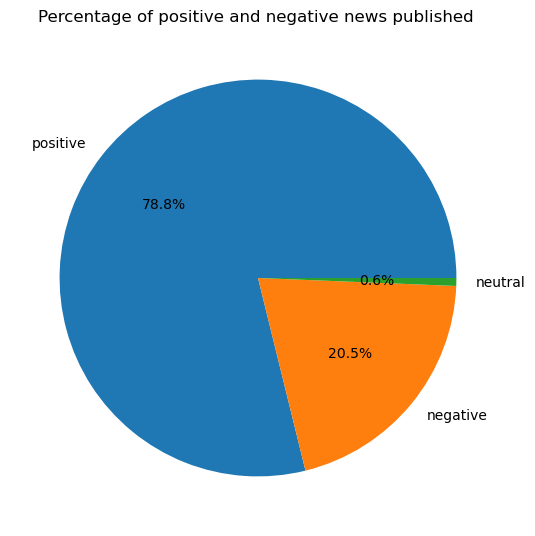

In [6]:
sentiment_counts = news_data['sentiment'].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Percentage of positive and negative news published ")

plt.subplots_adjust(bottom=-0.2)
plt.show()

# Sentiment and news category  Relation

---


### Lets analyse which category is likely to have more positive or negative news recently

In [7]:
category_counts = news_data.groupby(['category', 'sentiment']).size().reset_index(name = 'count')
pivot_table = category_counts.pivot(index='category', columns='sentiment', values='count')
print(pivot_table)

sentiment         negative  neutral  positive
category                                     
betting                NaN      NaN       2.0
economy                NaN      NaN       1.0
entertainment          1.0      NaN      16.0
extreme-weather        NaN      NaN       1.0
faith-values           2.0      NaN       NaN
food-drink             NaN      NaN       5.0
health                 NaN      NaN       5.0
lifestyle              1.0      NaN      10.0
markets                NaN      NaN       2.0
media                  9.0      NaN      12.0
opinion                1.0      NaN       7.0
personal-finance       NaN      NaN       4.0
politics               3.0      1.0      12.0
sports                 1.0      NaN      15.0
tech                   NaN      NaN       7.0
technology             NaN      NaN       1.0
travel                 NaN      NaN       2.0
us                    11.0      NaN      11.0
weather-news           2.0      NaN       2.0
world                  1.0      Na

### Plotting the chart that shows the sentiments of categorical news

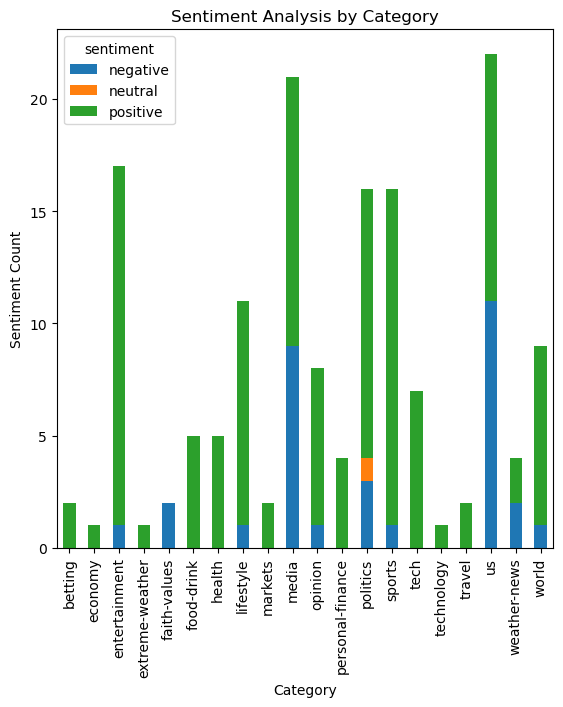

In [8]:
pivot_table.plot(kind='bar', stacked=True)

plt.xlabel('Category')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Analysis by Category')

plt.subplots_adjust(bottom=-0.2)
plt.show()

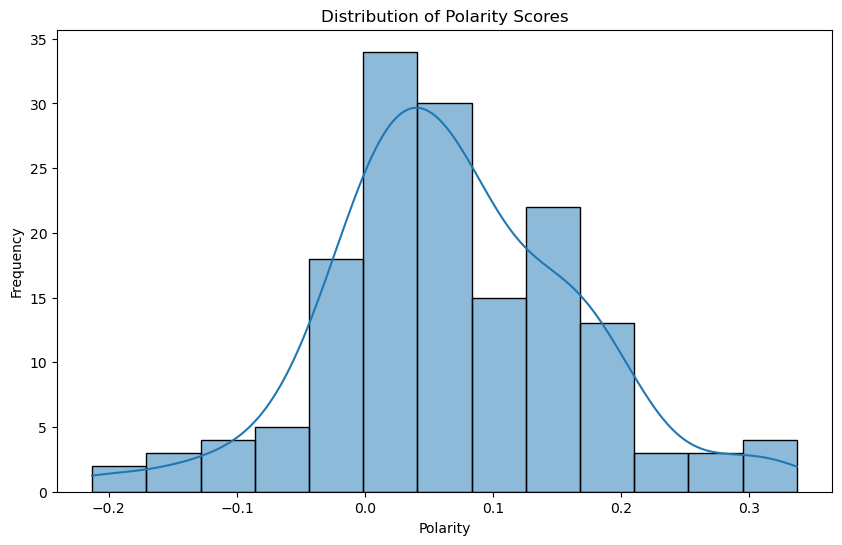

In [9]:
import seaborn as sns
# Distribution Plot (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=news_data, x='polarity', kde=True)
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

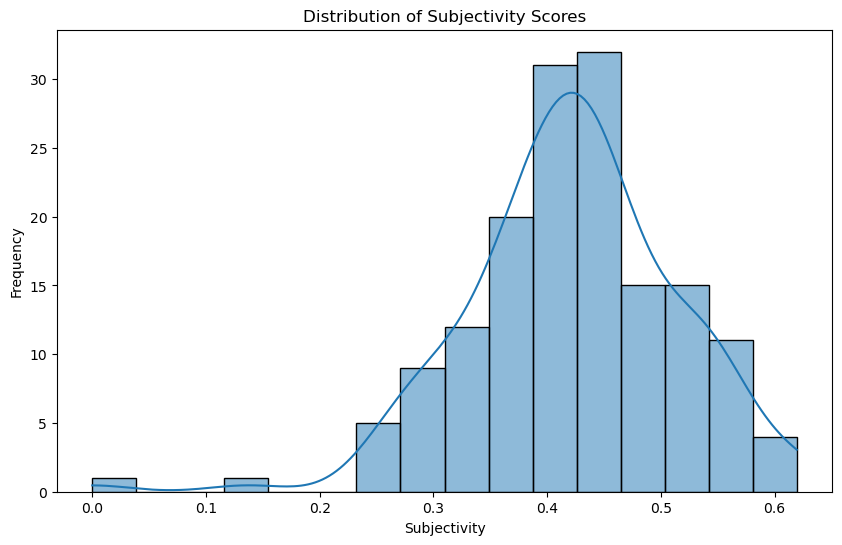

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=news_data, x='subjectivity', kde=True)
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

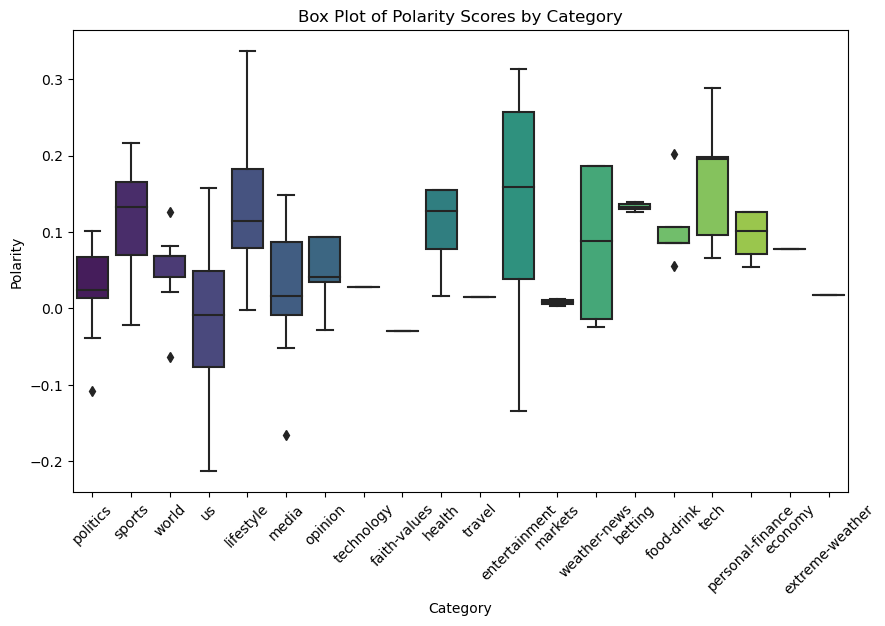

In [11]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=news_data, x='category', y='polarity', palette='viridis')
plt.title('Box Plot of Polarity Scores by Category')
plt.xlabel('Category')
plt.ylabel('Polarity')
plt.xticks(rotation=45)
plt.show()

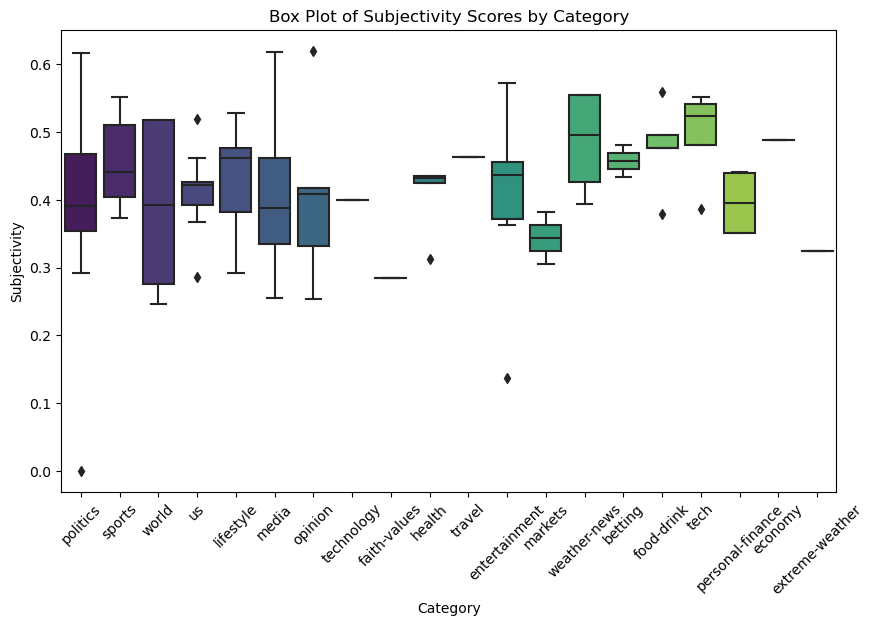

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=news_data, x='category', y='subjectivity', palette='viridis')
plt.title('Box Plot of Subjectivity Scores by Category')
plt.xlabel('Category')
plt.ylabel('Subjectivity')
plt.xticks(rotation=45)
plt.show()

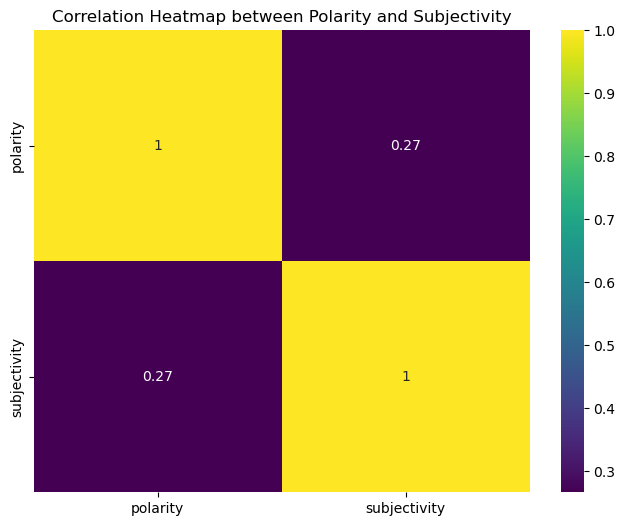

In [13]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(news_data[['polarity', 'subjectivity']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap between Polarity and Subjectivity')
plt.show()

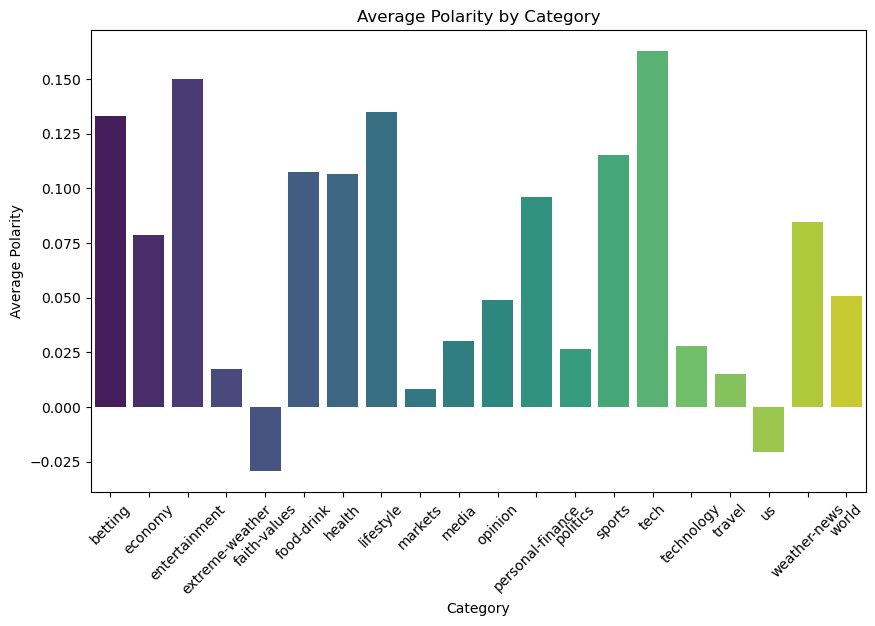

In [14]:
avg_scores_by_category = news_data.groupby('category')[['polarity', 'subjectivity']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_scores_by_category, x='category', y='polarity', palette='viridis')
plt.title('Average Polarity by Category')
plt.xlabel('Category')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.show()

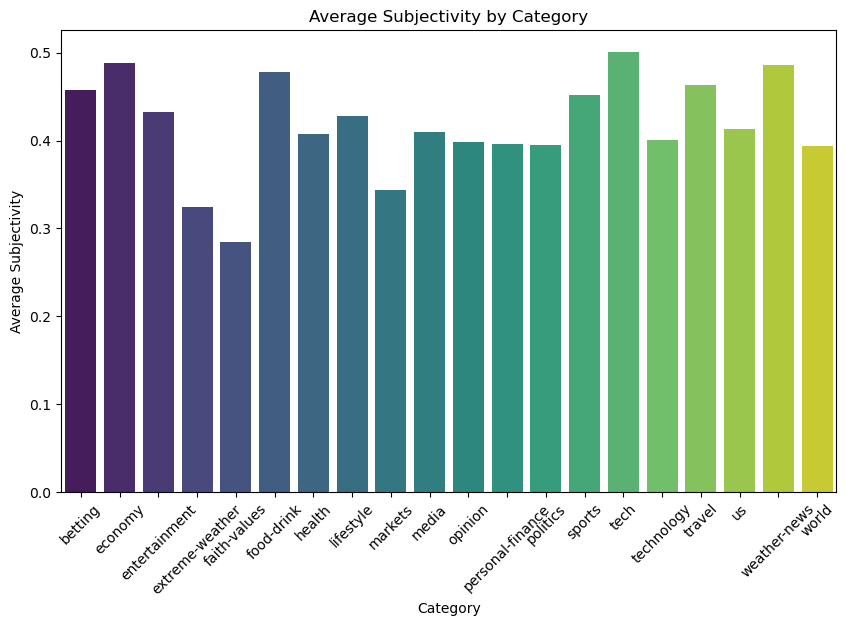

In [15]:

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_scores_by_category, x='category', y='subjectivity', palette='viridis')
plt.title('Average Subjectivity by Category')
plt.xlabel('Category')
plt.ylabel('Average Subjectivity')
plt.xticks(rotation=45)
plt.show()

# Now using different sentiment analysis (Vader sentiment)
unlike direct positive or negative values for sentiment analysis we set compount value of vader sentiment to exceed -0.3 to 0.3 to be called as very positive or negative polarity.

In [28]:
# updating vader sentiment data to dataframe

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
    if text != None:
        sentiment = analyzer.polarity_scores(text)
        if sentiment['compound'] >= 0.3:
            sentiment_label = 'positive'
        elif sentiment['compound'] <= -0.3:
            sentiment_label = 'negative'
        else:
            sentiment_label = 'neutral'
        return sentiment_label, sentiment['compound'], sentiment['pos'], sentiment['neg'], sentiment['neu']
    else:
        return None, None, None, None, None

news_data[['vader_sentiment', 'vader_compound', 'vader_pos', 'vader_neg', 'vader_neu']] = news_data['Corpus'].apply(lambda x: pd.Series(get_vader_sentiment(x)))
news_data.head()


,Title,Link,Corpus,category,author,timeanddate,sentiment,polarity,subjectivity,vader_sentiment,vader_compound,vader_pos,vader_neg,vader_neu,Article_Length
0,GOP lawmaker eyes backup plan for AG Garland's...,https://www.foxnews.com/politics/anna-paulina-...,merrick garland trying blur lines legit doj cr...,politics,Elizabeth Elkind,"June 12, 2024 10:10am EDT",negative,-0.005429,0.334163,negative,-0.9938,0.089,0.206,0.705,319
1,Historian with ace record calling elections sa...,https://www.foxnews.com/politics/who-has-keys-...,historian called last presidential elections r...,politics,Chris Pandolfo,"June 12, 2024 4:00am EDT",positive,0.020325,0.395585,positive,0.8639,0.158,0.148,0.694,664
2,NBA legend whose silhouette is famously repres...,https://www.foxnews.com/sports/nba-legend-jerr...,reached maximum number log create reading jerr...,sports,Ryan Gaydos,"June 12, 2024 9:52am EDT",positive,0.086841,0.448597,positive,0.9929,0.171,0.034,0.796,312
3,Researchers decode earliest known written reco...,https://www.foxnews.com/world/german-researche...,reached maximum number log create reading rese...,world,Anders Hagstrom,"June 12, 2024 7:27am EDT",positive,0.068056,0.518254,positive,0.9201,0.096,0.025,0.879,209
4,Moment MLB fan tased after running onto field ...,https://www.foxnews.com/sports/reds-fan-tased-...,reds fan runs onto field backflip gets tased c...,sports,Ryan Gaydos,"June 12, 2024 9:45am EDT",positive,0.014466,0.407395,positive,0.9796,0.228,0.110,0.662,208


In [29]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            156 non-null    object 
 1   Link             156 non-null    object 
 2   Corpus           156 non-null    object 
 3   category         156 non-null    object 
 4   author           155 non-null    object 
 5   timeanddate      156 non-null    object 
 6   sentiment        156 non-null    object 
 7   polarity         156 non-null    float64
 8   subjectivity     156 non-null    float64
 9   vader_sentiment  156 non-null    object 
 10  vader_compound   156 non-null    float64
 11  vader_pos        156 non-null    float64
 12  vader_neg        156 non-null    float64
 13  vader_neu        156 non-null    float64
 14  Article_Length   156 non-null    int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 18.4+ KB


In [30]:
news_data.describe()

,polarity,subjectivity,vader_compound,vader_pos,vader_neg,vader_neu,Article_Length
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.068224,0.421704,0.236696,0.155538,0.110212,0.734231,431.448718
std,0.097250,0.092084,0.921684,0.066027,0.070788,0.076323,245.808247
min,-0.212911,0.000000,-0.999300,0.016000,0.000000,0.546000,113.000000
25%,0.014171,0.372579,-0.939125,0.106750,0.049750,0.680500,267.500000
50%,0.064140,0.425794,0.955300,0.153000,0.100000,0.735000,369.000000
75%,0.129875,0.477007,0.992950,0.196250,0.169000,0.793250,500.000000
max,0.337024,0.619554,0.999900,0.364000,0.318000,0.984000,1587.000000


### Saving Dataframe with sentiment

adding article length variable too to sentiment_fox_news.csv

In [17]:
news_data['Article_Length'] = news_data['Corpus'].apply(lambda x: len(x.split()) if x else 0)
news_data.to_csv('work\\sentiment_fox_news.csv', index = 'False')

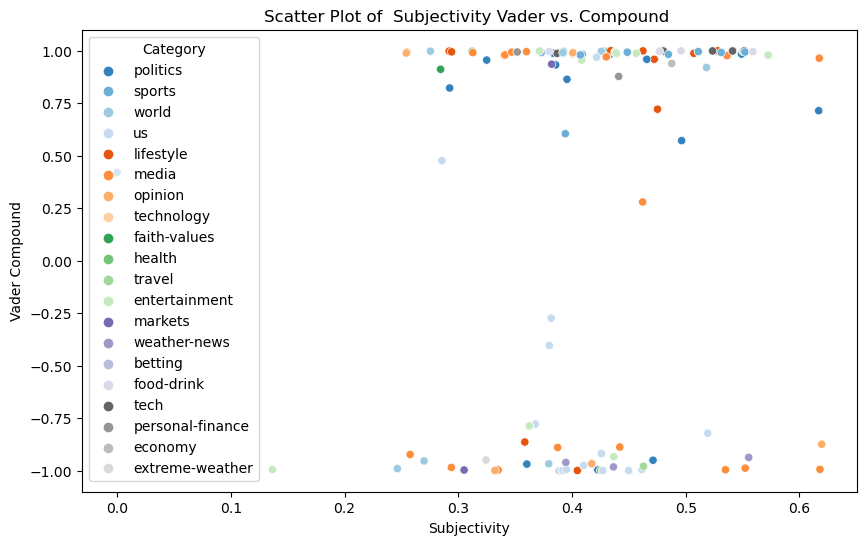

In [32]:
import seaborn as sns
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=news_data, x='subjectivity', y='vader_compound', hue='category', palette='tab20c')
plt.title('Scatter Plot of  Subjectivity Vader vs. Compound ')
plt.xlabel('Subjectivity')
plt.ylabel('Vader Compound')
plt.legend(title='Category')
plt.show()

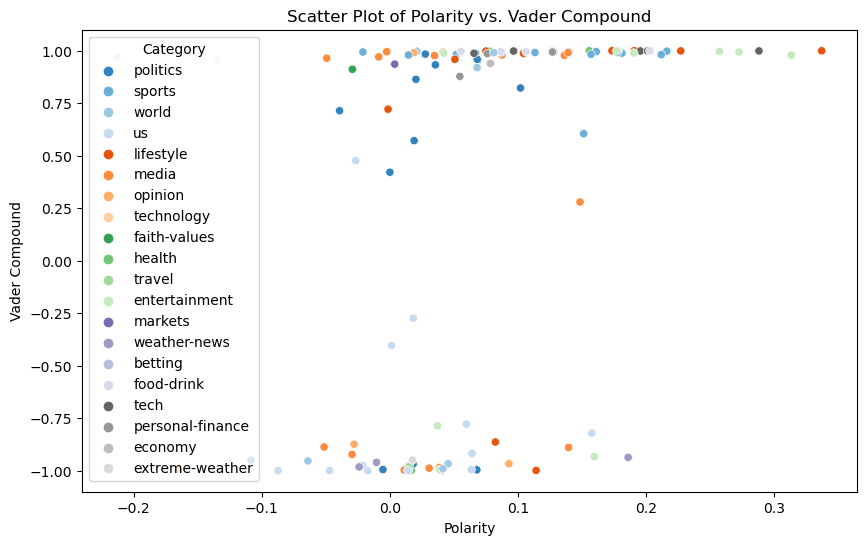

In [19]:
import seaborn as sns
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=news_data, x='polarity', y='vader_compound', hue='category', palette='tab20c')
plt.title('Scatter Plot of Polarity vs. Vader Compound')
plt.xlabel('Polarity')
plt.ylabel('Vader Compound')
plt.legend(title='Category')
plt.show()

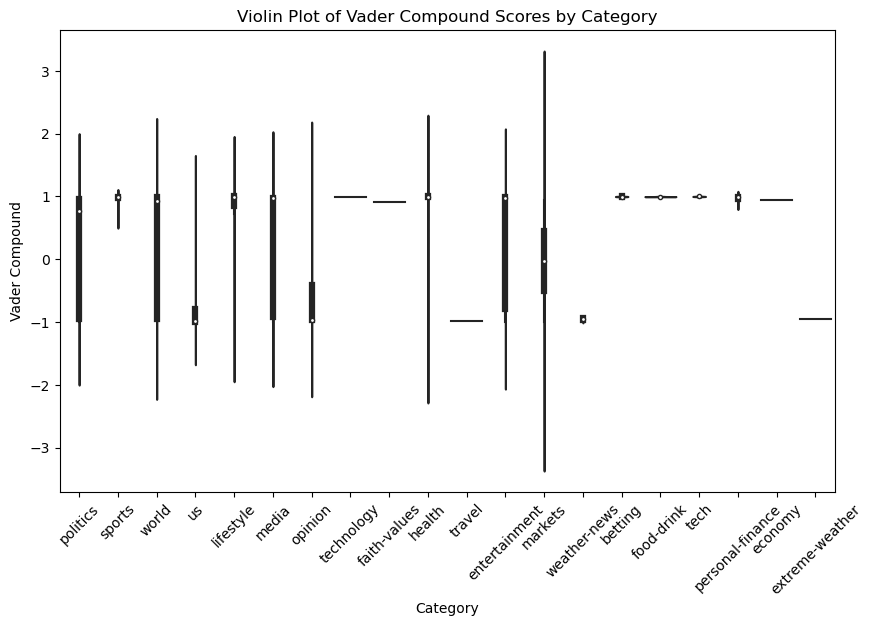

In [20]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=news_data, x='category', y='vader_compound', palette='viridis')
plt.title('Violin Plot of Vader Compound Scores by Category')
plt.xlabel('Category')
plt.ylabel('Vader Compound')
plt.xticks(rotation=45)
plt.show()

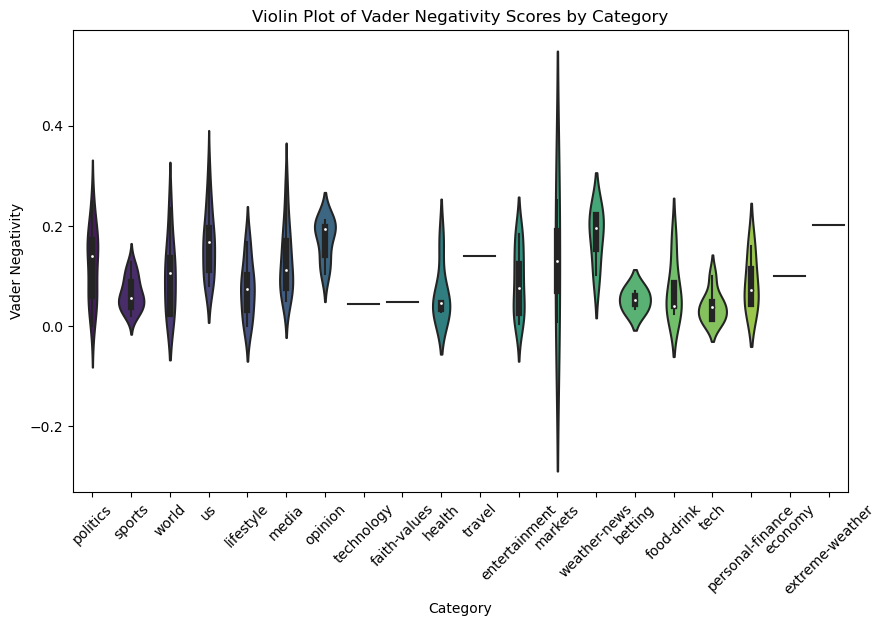

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=news_data, x='category', y='vader_neg', palette='viridis')
plt.title('Violin Plot of Vader Negativity Scores by Category')
plt.xlabel('Category')
plt.ylabel('Vader Negativity')
plt.xticks(rotation=45)
plt.show()

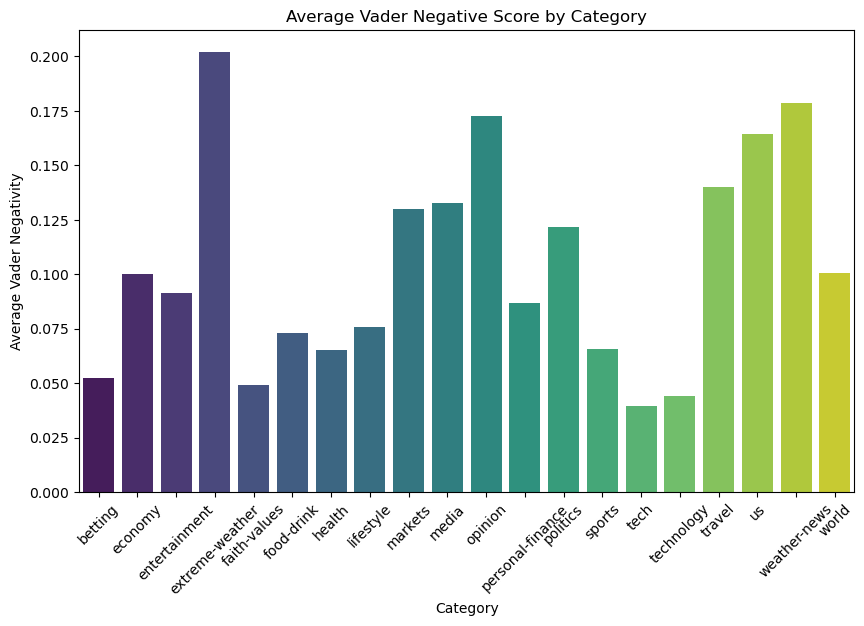

In [22]:
avg_scores_by_category = news_data.groupby('category')[['vader_neg', 'vader_pos']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_scores_by_category, x='category', y='vader_neg', palette='viridis')
plt.title('Average Vader Negative Score by Category')
plt.xlabel('Category')
plt.ylabel('Average Vader Negativity')
plt.xticks(rotation=45)
plt.show()

# Authors Visualization

In [23]:
author_stats = news_data.groupby('author').agg(
    num_articles=('Title', 'count'),
    avg_polarity=('polarity', 'mean'),
    avg_subjectivity=('subjectivity', 'mean')
).reset_index()
author_category_stats = news_data.groupby(['author','category']).agg(
    num_articles=('Title', 'count'),
    avg_polarity=('polarity', 'mean'),
    avg_subjectivity=('subjectivity', 'mean')
).reset_index()
author_category_stats.head()
author_stats.head()

,author,num_articles,avg_polarity,avg_subjectivity
0,Aislinn Murphy,2,0.015929,0.391274
1,Amy Nelson,1,0.087500,0.341077
2,Anders Hagstrom,3,0.068056,0.518254
3,Andrea Vacchiano,1,0.082333,0.358500
4,Angelica Stabile,1,0.127778,0.294136


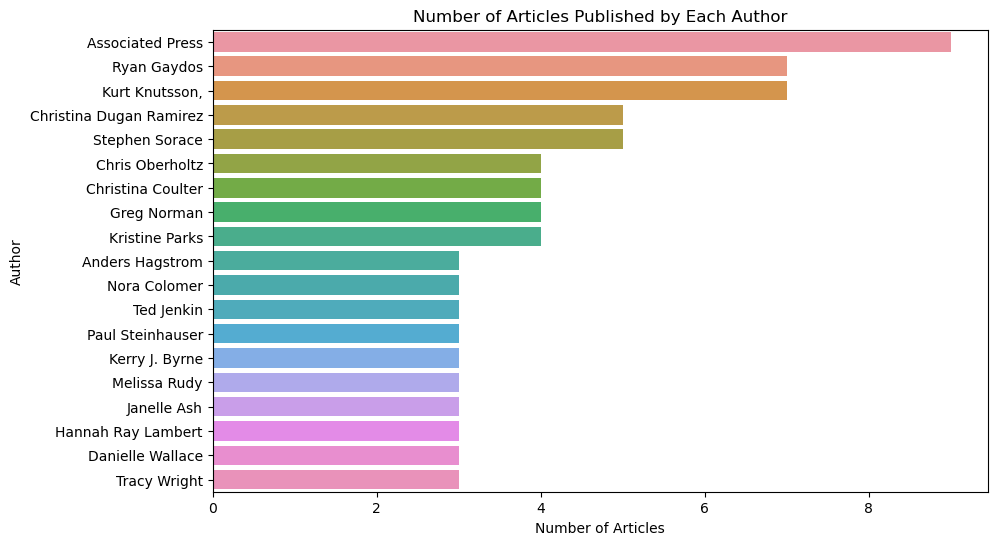

In [24]:
multiple_articles_authors = author_stats[author_stats['num_articles'] > 2]
# Plot for authors with two or more articles
plt.figure(figsize=(10, 6))
sns.barplot(x='num_articles', y='author', data=multiple_articles_authors.sort_values(by='num_articles', ascending=False))
plt.title('Number of Articles Published by Each Author')
plt.xlabel('Number of Articles')
plt.ylabel('Author')
plt.show()

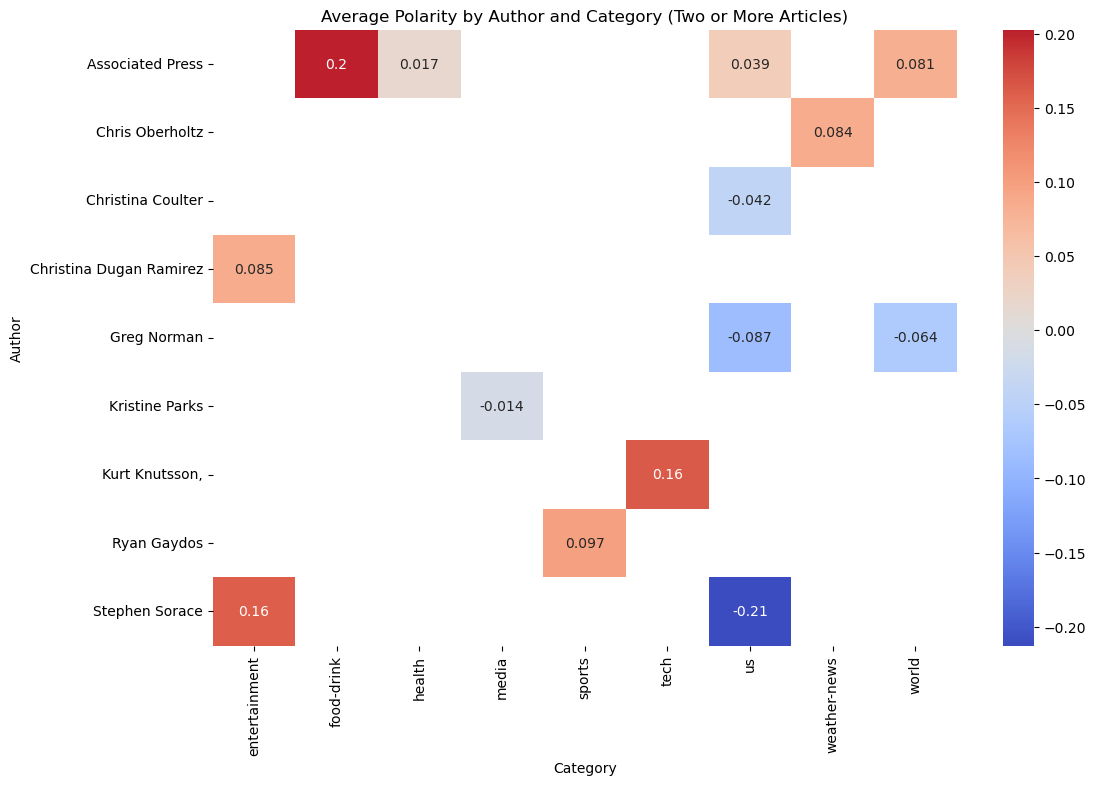

In [25]:
multiple_articles_authors = author_stats[author_stats['num_articles'] > 3]['author']
multiple_article_stats = author_category_stats[author_category_stats['author'].isin(multiple_articles_authors)]
author_category_pivot_polarity_multiple = multiple_article_stats.pivot('author', 'category', 'avg_polarity')
# Plot for authors with two or more articles
plt.figure(figsize=(12, 8))
sns.heatmap(author_category_pivot_polarity_multiple, annot=True, cmap='coolwarm', center=0)
plt.title('Average Polarity by Author and Category (Two or More Articles)')
plt.xlabel('Category')
plt.ylabel('Author')
plt.show()

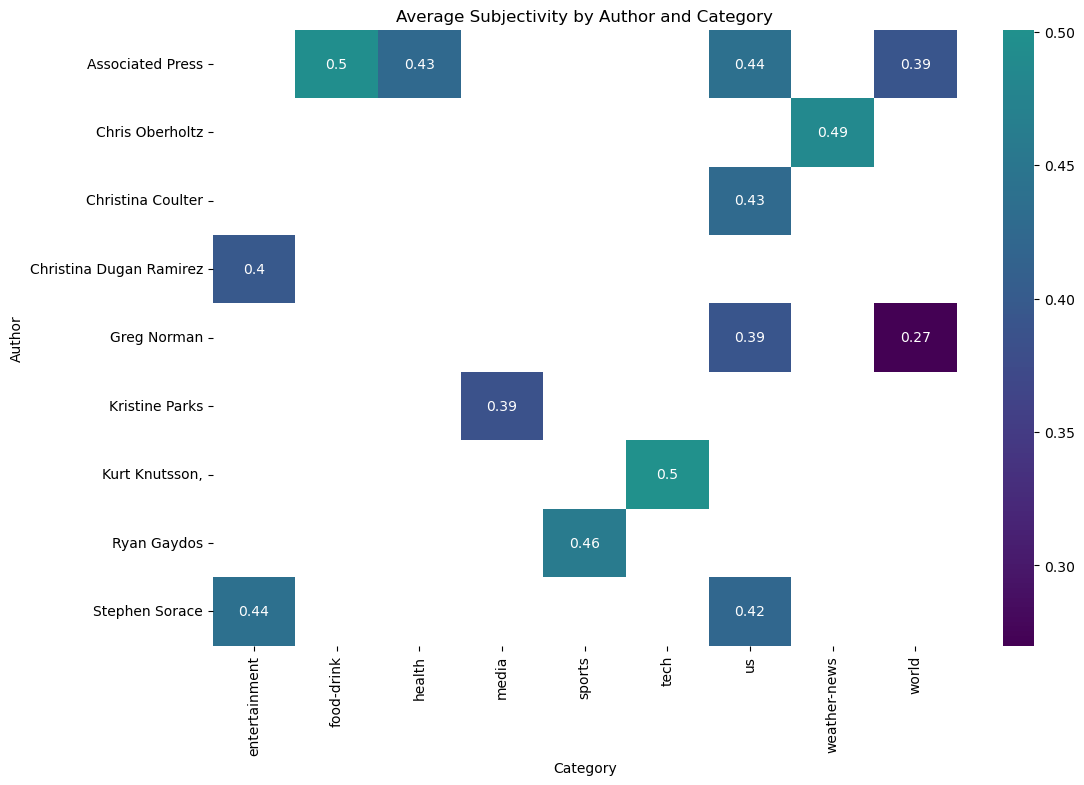

In [26]:
multiple_articles_authors = author_stats[author_stats['num_articles'] > 3]['author']

# Filter author_category_stats based on these authors
multiple_article_stats = author_category_stats[author_category_stats['author'].isin(multiple_articles_authors)]

# Create pivot table for the subset
author_category_pivot_subjectivity_multiple = multiple_article_stats.pivot('author', 'category', 'avg_subjectivity')

# Plot for authors with more than two articles
plt.figure(figsize=(12, 8))
sns.heatmap(author_category_pivot_subjectivity_multiple, annot=True, cmap='viridis', center=0.5)
plt.title('Average Subjectivity by Author and Category')
plt.xlabel('Category')
plt.ylabel('Author')
plt.show()

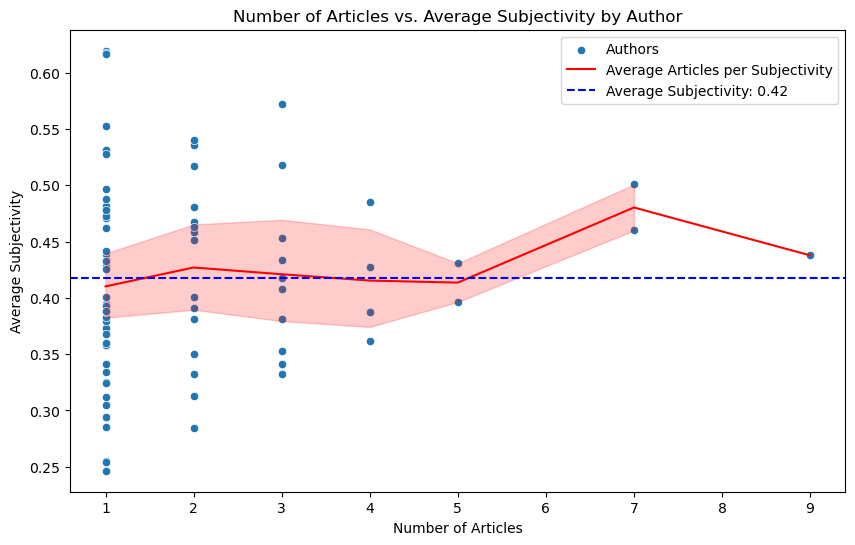

In [34]:
average_subjectivity = author_stats['avg_subjectivity'].mean()

avg_articles_per_subjectivity = author_stats.groupby('avg_subjectivity')['num_articles'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_articles', y='avg_subjectivity', data=author_stats, label='Authors')
sns.lineplot(x='num_articles', y='avg_subjectivity', data=avg_articles_per_subjectivity, color='red', label='Average Articles per Subjectivity')
plt.axhline(y=average_subjectivity, color='blue', linestyle='--', label=f'Average Subjectivity: {average_subjectivity:.2f}')
plt.title('Number of Articles vs. Average Subjectivity by Author')
plt.xlabel('Number of Articles')
plt.ylabel('Average Subjectivity')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b5372552-bc21-445b-8f65-92a12c531f6c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>